In [3]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

projectdir = Path('.').resolve().parents[2]
path = f'{projectdir}/milestones/data/targetscan/unweighted_TargetScanHuman_human_mouse_mir197_mir769.tsv'
clusterpath = f'{projectdir}/milestones/data/doapr/global_heatmap_gene_order.txt'

tardf = pd.read_csv(path, sep='\t')
a = np.char.array(tardf['organism'].values)
b = np.char.array(tardf['mirna'].values)
tardf['label'] = (a + b'|' + b).astype(str)
tardf.drop(columns=['organism', 'mirna'], inplace=True)
display(tardf)

,target_gene,Total context++ score,label
0,M6PR,-0.073,mouse|mir769
1,CYP26B1,-0.028,mouse|mir769
2,PDK4,-0.148,mouse|mir769
3,BAIAP2L1,-0.100,mouse|mir769
4,HOXA11,-0.123,mouse|mir769
...,...,...,...
14843,GPRIN3,-0.020,human|mir197
14844,GRIN2B,-0.190,human|mir197
14845,SLC25A16,-0.010,human|mir197
14846,RPAP2,-0.120,human|mir197


## Pive to wide format

In [10]:
pivdf = tardf.pivot_table(values='Total context++ score', index=['target_gene'], columns=['label'], fill_value=0)
display(pivdf)


label,human|mir197,human|mir769,mouse|mir197,mouse|mir769
target_gene,,,,
A1BG,0.000,-0.030,0.000,0.000
AACS,-0.360,0.000,0.000,-0.040
AADACL3,-0.107,0.000,-0.380,-0.226
AAED1,0.000,0.000,-0.472,0.000
AAGAB,0.000,-0.146,-0.218,-0.126
...,...,...,...,...
ZXDB,-0.027,0.000,0.000,0.000
ZXDC,-0.112,-0.060,0.000,-0.020
ZYG11B,-0.070,0.000,0.000,0.000


## Filter for genes in down and predicted heatmap cluster

In [15]:
with open(clusterpath) as fh:
    cluster = [gene.strip() for gene in fh if gene]
    
heat_df = pivdf.loc[cluster, :]
heat_df = heat_df.reindex(cluster)
display(heat_df)

label,human|mir197,human|mir769,mouse|mir197,mouse|mir769
target_gene,,,,
NFASC,-0.250,0.00,-0.010,0.000
SYK,-0.500,-0.07,-0.010,0.000
PGBD5,-0.500,0.00,0.000,0.000
PGPEP1,-1.420,-0.35,0.000,0.000
FLOT1,0.000,0.00,0.000,-0.330
...,...,...,...,...
BDH1,-0.156,0.00,-0.539,-0.139
CYLD,-0.260,0.00,0.000,0.000
SLC16A12,-0.450,-0.11,0.000,0.000


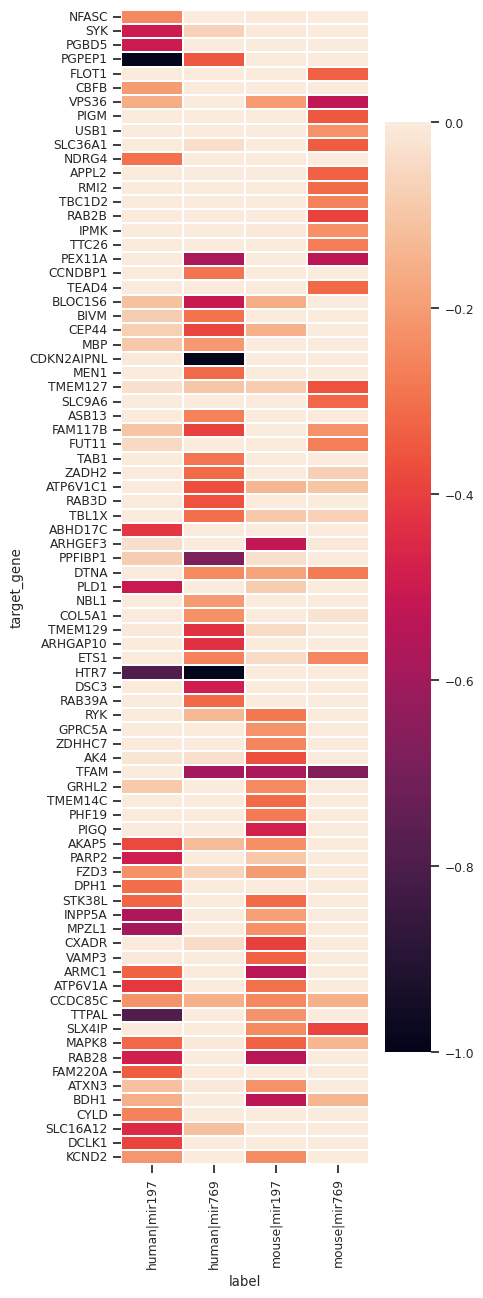

In [22]:
sns.set(rc={'figure.figsize':(4,15), 'ytick.left': True, 'xtick.bottom': True}, font_scale = 0.8, style='whitegrid')

sns.heatmap(
    heat_df,
    yticklabels=True, 
    # figsize=(6,15), 
    linewidth=0.05, 
    vmin=-1,

    )
plt.show()


In [34]:
# organism = 'human'
mirna = 'mir197'
gene = 'SLX4IP'

def rnaseq_gene_slice(organism, mirna, gene):
    df = pd.read_csv(f'/home/felixl/PycharmProjects/rodent_loss/analyses/rnaseq/data/{organism}_results_Neg_vs_{mirna}.tsv', sep='\t')
    if organism == 'human':
        df = df[df['Ensembl gene'] == gene.upper()]
        df = df.filter(['Ensembl gene', 'baseMean', 'baseMeanA Neg-Ctl', 'baseMeanB miR-197', 'log2FoldChange miR-197/Neg-Ctl', 'pvalue', 'padj'])
    elif organism == 'mouse':
        df = df[df['Ensembl gene'] == gene.capitalize()]
        df = df.filter(['Ensembl gene', 'baseMean', 'baseMeanA CTRL', 'baseMeanB miR-197', 'log2FoldChange miR-197/CTRL', 'pvalue', 'padj'])
    display(df)
    
rnaseq_gene_slice('human', mirna, gene)
rnaseq_gene_slice('mouse', mirna, gene)

,Ensembl gene,baseMean,baseMeanA Neg-Ctl,baseMeanB miR-197,log2FoldChange miR-197/Neg-Ctl,pvalue,padj
532,SLX4IP,317.316933,357.222413,277.411452,-0.363637,0.000461,0.011701


,Ensembl gene,baseMean,baseMeanA CTRL,baseMeanB miR-197,log2FoldChange miR-197/CTRL,pvalue,padj
354,Slx4ip,170.914587,202.9814,138.847775,-0.54458,3.915391e-07,0.000017
